In [1]:
#Neccessary Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import datetime
import yahoo_fin.stock_info as yahoo_fin
from bs4 import BeautifulSoup
import requests
import scipy.stats
from scipy.stats import kde
import pylab
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
py.offline.init_notebook_mode(connected = True)

In [2]:
#Get's the Stock Sticker the user wants
user_stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
user_stock = user_stock.upper()

Pick a Dividend Paying Stock's Ticker Symbol: ohi


In [3]:
#Gets the string format for Dates
def Dates(date):
    dateString = ''
    for val in str(date):
        if(val == ' '):
            break
        elif(val == '-'):
            dateString = dateString + '/'   
        else:
            dateString = dateString + val
            
    return dateString

In [4]:
#This Function is for the 3 valuation ratios
def ValuationRatios(soup):
    finder = []
    holder = []
    holder2 = []
    holder3 = []
    
    for value in soup.find_all('td',style = 'text-align:center;'):
        finder.append(value.text)
      
    #Gets the PE Ratios
    for index in range(7,len(finder),4):
        holder.append(float(finder[index]))
        
    #Gets the date of the PE Ratios  
    for index in range(4,len(finder),4):
        holder2.append(str(finder[index]))
        
    for index in range(6,len(finder),4):
        i = finder[index][1:]
        holder3.append(float(i))
        
        
        
    #Gets the dataframe for the PEs
    PEdataframe = pd.DataFrame({'Dates': holder2,
                               'PEs':holder,
                               'EPS':holder3})
        
    return PEdataframe

In [5]:
#Gets the soup for the link provided
def SoupGetter(searchVar):
    source = requests.get(searchVar,allow_redirects=False).text
    soup = BeautifulSoup(source,'lxml')
    return soup

In [6]:
# This function will give us the point that's closest to the sample mean to estimate with
def BoxplotMeanDot(data):
    closestMean =  abs(statistics.mean(PEs) - data[0])
    for num in range(0,len(data),1):
        if(abs(statistics.mean(data) - data[num]) < closestMean):
            closestMean = abs(statistics.mean(data) - data[num])
            PEC = data[num]
        else:
            pass
        
    return float(PEC)

In [7]:
#converts strings into floats
def locator(data_array):
    desired_array2 = []
    desired_array3 = []
            
# Converts the data that is negative into a readable negative strings            
    for value in data_array:
        if(value.startswith('(') == True):
            value = value[1:-1]
            value = '-'+ value
        else:
            pass
        desired_array2.append(value)
        
# Converts the into useable numerical values        
    for item in desired_array2:
        if(str(item[-1]) == 'B'):
            item = float(item[0:-1]) * 1000000000
        elif(str(item[-1]) == 'M'):
            item = float(item[0:-1]) * 1000000
        elif(str(item[-1]) == 'T'):
            item = float(item[0:-1]) * 1000000000000
        elif(str(item[-1]) == 'K'):
            item = float(item[0:-1]) * 1000
        elif(str(item) == '-'):
            item = np.NaN
        else:
            temp = ''
            for char in item:
                item = item.split(',')
                for i in item:
                    temp += i
                item = float(temp)
        desired_array3.append(item)
            
    return desired_array3

In [8]:
#Transform nan to zero for the SaleGains variable
def NaNZero(array):
    x = []
    for i in array:
        if(i is np.nan):
            x.append(0)
        else:
            x.append(i)
    return x

In [9]:
#Function for plotting two lines on a plot
def pyplot2plots(name1,array1x,array1y,name2,array2x,array2y):
    layout = go.Layout(
    title = f"Yearly {user_stock}'s {name1} V. {name2}'",
    yaxis = dict(
        title = "$"
        ),
    xaxis = dict(
        title = 'Date'
        )
    )

    trace1 = go.Scatter(
        x = array1x,
        y = array1y,
        mode = 'lines+markers',
        name = name1,
        line = dict(
                shape = 'linear'
        ),
        marker = dict(
                size = 10
        )

    )

    trace2 = go.Scatter(
        x = array2x,
        y = array2y,
        mode = 'lines+markers',
        name = name2,
        line = dict(
                shape = 'linear'
        ),
        marker = dict(
                size = 10
        )
    )

    fig = go.Figure(data = [trace1,trace2],layout = layout)
    return py.offline.iplot(fig)

In [10]:
#Function for plotting 1 line on a plot
def pyplot1plot(name,x,y,yaxe = '$'):
    layout = go.Layout(
    title = f"{user_stock}'s {name} Time Series",
    yaxis = dict(
        title = yaxe
    ),
    xaxis = dict(
        title = 'Date'
        )
    )

    trace1 = go.Scatter(
        x = x,
        y = y,
        mode = 'lines+markers',
        name = name,
        line = dict(
                shape = 'linear'
        ),
        marker = dict(
                size = 10
        )
    )

    fig = go.Figure(data = [trace1],layout = layout)
    return py.offline.iplot(fig)

In [11]:
def pyplot1dash(x1,y1,name1,y2,colorDash):
    layout = go.Layout(
    title = f"{user_stock}'s {name1} Timeseries",
    yaxis = dict(
        title = name1
    ),
    xaxis = dict(
        title = 'Date'
        ),
    showlegend = False
    )

    trace1 = go.Scatter(
        x = x1,
        y = y1,
        mode = 'lines+markers',
        name = name1,
        line = dict(
                shape = 'linear'
        ),
        marker = dict(
                size = 10
        )

    )

    trace2 = go.Scatter(
        x = x1,
        y = [y2,y2,y2,y2,y2],
        mode = 'lines',
        line = dict(
                shape = 'hv',
                dash = 'dash',
                color = colorDash
        )
    )

    fig = go.Figure(data = [trace1,trace2],layout = layout)
    return py.offline.iplot(fig)

In [12]:
def pyplotBar(x,y,xaxe,yaxe,main):
    layout = go.Layout(
    title = main,
    yaxis = dict(
        title = yaxe
        ),
    xaxis = dict(
        title = xaxe
        )
    )
    
    trace1 = go.Bar(
        x = x,
        y = y
        
    )
    
    fig = go.Figure(data = [trace1],layout = layout)
    return py.offline.iplot(fig)

In [13]:
def pyplotScatter(name,x,y,xaxe,yaxe):
    layout = go.Layout(
    title = f"{user_stock}'s Correlation w/ {name}",
    yaxis = dict(
        title = yaxe
        ),
    xaxis = dict(
        title = xaxe
        )
    )

    trace1 = go.Scatter(
        x = x,
        y = y,
        mode = 'markers',
        marker = dict(
                size = 10
        )

    )

    fig = go.Figure(data = [trace1],layout = layout)
    return py.offline.iplot(fig)

In [14]:
#Webscrapes the Sector of the stock
sectors = SoupGetter(f"https://www.marketwatch.com/investing/stock/{user_stock}/company-profile?mod=mw_quote_tab")

sectorList = []
for value in sectors.find_all('span', class_ = 'primary'):
    sectorList.append(value.text)
    
sector = sectorList[7]
industry = sectorList[6]

#Correct for false sector designation
if(industry == 'Consumer Finance'):
    sector = 'Technology'
else:
    pass
print(sector)

Real Estate/Construction


In [15]:
#Gets stock price over a certain of time the user wants

#Gets today's date
today_time = datetime.datetime.now()
today_date = str(Dates(pd.to_datetime(today_time,yearfirst = True)))
print(today_date)

#Gets the date 20 Years ago
twentyYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 20 * 365))

#Gets the years for the financial graphs
year = int(datetime.datetime.now().year) - 1
years = [year,year-1,year-2,year-3,year-4]
years = [str(i) + '/12/31' for i in years]
years = np.flip(years)
ffoX = datetime.datetime.strptime(str(datetime.datetime.now().year) + '/12/31','%Y/%m/%d')
print(ffoX)

2021/12/17
2021-12-31 00:00:00


In [16]:
#Gets the neccessary Stonk Data Prices
stonkPrices = yahoo_fin.get_data(user_stock,start_date = str(twentyYr_date),end_date = today_date)
stonkPrices['dates'] = pd.to_datetime(stonkPrices.index)

#Gets the Bernoulli Probability of the Stock to go up 
priceChanges = [100*i for i in stonkPrices['close'].pct_change()]

bernoulli = []
for price in priceChanges[1:]:
    if(price >= 0):
        bernoulli.append(1)
    else:
        bernoulli.append(0)
        
bernoulli = sum(bernoulli)/len(bernoulli)

#Gets the Stock Price Volatilility
volatility = statistics.stdev(priceChanges[1:])

In [17]:
#Gets the dividend data and the percent changes
dividends = yahoo_fin.get_dividends(user_stock,start_date = '2000-01-01' ,end_date = '2021-01-01',index_as_date = False)
print(dividends)
#Gets dividends by the year
if(len(dividends) > 0):
    divX = dividends.groupby(dividends.date.dt.year)
    divPays = []
    divYears = []
    for key, item in divX:
        divPays.append(sum(item['dividend']))
        divYears.append(key)

    dividendData = pd.DataFrame({'Years': divYears,
                                'Dividends': divPays})
    
else:
    dividendData = pd.DataFrame({'Years': [np.nan],
                                'Dividends': [np.nan]})
print(dividendData)

         date  dividend ticker
0  2000-01-26      0.50    OHI
1  2000-08-03      0.25    OHI
2  2000-10-27      0.25    OHI
3  2003-10-29      0.15    OHI
4  2004-01-29      0.17    OHI
..        ...       ...    ...
68 2019-10-30      0.67    OHI
69 2020-01-30      0.67    OHI
70 2020-04-29      0.67    OHI
71 2020-07-30      0.67    OHI
72 2020-10-30      0.67    OHI

[73 rows x 3 columns]
    Years  Dividends
0    2000       1.00
1    2003       0.15
2    2004       0.72
3    2005       0.85
4    2006       0.96
5    2007       1.08
6    2008       1.19
7    2009       1.20
8    2010       1.37
9    2011       1.55
10   2012       1.69
11   2013       1.86
12   2014       2.02
13   2015       2.18
14   2016       2.36
15   2017       2.54
16   2018       2.64
17   2019       2.65
18   2020       2.68


In [18]:
#Gets Essential Balance Sheet data 
BalanceSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/balance-sheet'.format(user_stock))

index = 0

#Puts all BalanceSheet data in a array
BalanceData = []
for i in BalanceSoup.find_all('div',class_ = 'cell__content'):
    BalanceData.append(str(i.text))
    
#Gets balance sheet data from real estate companies
if(sector == 'Real Estate/Construction'):
    
    #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Debt','Total Liabilities','Total Equity',"Total Shareholders' Equity"]
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years': years,
                                          'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                          'Total_Debt':locator(list(SortedBalanceSheet[5:10])),
                                          'Total_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                          'Total_Equity':locator(list(SortedBalanceSheet[15:20])),
                                          "Shareholder's_Equity":locator(list(SortedBalanceSheet[20:25])),
                                          'Total_Current_Assets':[np.nan,np.nan,np.nan,np.nan,np.nan],
                                          'Total_Current_Liabilities':[np.nan,np.nan,np.nan,np.nan,np.nan]
                                     })

#Gets balance sheet data from financial services companies
elif(sector == 'Financial Services'):
    
     #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Debt','Total Liabilities','Total Equity',"Total Shareholders' Equity"]
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years': years,
                                          'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                          'Total_Debt':locator(list(SortedBalanceSheet[5:10])),
                                          'Total_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                          'Total_Equity':locator(list(SortedBalanceSheet[15:20])),
                                          "Shareholder's_Equity":locator(list(SortedBalanceSheet[20:25])),
                                          'Total_Current_Assets':[np.nan,np.nan,np.nan,np.nan,np.nan],
                                          'Total_Current_Liabilities':[np.nan,np.nan,np.nan,np.nan,np.nan]
                                     })

else:
    
    #List of desired lines of a balance sheet 
    desiredBalance = ['Total Current Assets','Total Assets','Total Current Liabilities','Total Liabilities',
                     'Long-Term Debt','Total Equity',"Total Shareholders' Equity",'Inventories',
                     'Interest Expense','Income Tax']
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
            
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                      'Total_Current_Assets':locator(list(SortedBalanceSheet[0:5])),
                                     'Total_Assets':locator(list(SortedBalanceSheet[5:10])),
                                     'Total_Current_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                      'Total_Liabilities':locator(list(SortedBalanceSheet[15:20])),
                                    'Total_Debt':locator(list(SortedBalanceSheet[20:25])),
                                    'Total_Equity':locator(list(SortedBalanceSheet[25:30])),
                                    "Shareholder's_Equity":locator(list(SortedBalanceSheet[30:35])),
                                    'Inventories':locator(list(SortedBalanceSheet[35:40]))
                                         })
    BalanceSheetDataFrame.fillna(0,inplace = True)
        

print(BalanceSheetDataFrame)

        Years  Total_Assets    Total_Debt  Total_Liabilities  Total_Equity  \
0  2016/12/31  8.950000e+09  4.460000e+09       4.740000e+09  4.210000e+09   
1  2017/12/31  8.770000e+09  4.650000e+09       4.890000e+09  3.890000e+09   
2  2018/12/31  8.590000e+09  4.610000e+09       4.830000e+09  3.760000e+09   
3  2019/12/31  9.800000e+09  5.210000e+09       5.460000e+09  4.340000e+09   
4  2020/12/31  9.500000e+09  5.210000e+09       5.460000e+09  4.040000e+09   

   Shareholder's_Equity  Total_Current_Assets  Total_Current_Liabilities  
0          3.860000e+09                   NaN                        NaN  
1          3.560000e+09                   NaN                        NaN  
2          3.440000e+09                   NaN                        NaN  
3          4.140000e+09                   NaN                        NaN  
4          3.840000e+09                   NaN                        NaN  


In [19]:
IncomeSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/income'.format(user_stock))

#Puts all Income Statement data in a array
IncomeData = []
for i in IncomeSoup.find_all('div',class_ = 'cell__content'):
    IncomeData.append(str(i.text))
    
# For Reits
if(sector == 'Real Estate/Construction'):
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Depreciation & Amortization Expense',
                     'Extra Items & Gain/Loss Sale Of Assets','Basic Shares Outstanding','Total Interest Expense',
                     'Income Taxes']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass 

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass
    

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                          'Net_Income': locator(list(SortedIncome[0:5])),
                                          'Revenue': locator(list(SortedIncome[5:10])),
                                          'Depreciation&Amortization': locator(list(SortedIncome[10:15])),
                                          'SaleGains': NaNZero(locator(list(SortedIncome[15:20]))),
                                          'Shares':locator(list(SortedIncome[20:25])),
                                          'Interest_Expense':locator(list(SortedIncome[25:30])),
                                          'Income_Tax':locator(list(SortedIncome[30:35]))
                                         })

    IncomeDataFrame['FFO'] = (IncomeDataFrame['Net_Income'] + IncomeDataFrame['Depreciation&Amortization'] - IncomeDataFrame['SaleGains']) / IncomeDataFrame['Shares']

elif(sector == 'Financial Services'):
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Total Internest Expense','Income Taxes','Basic Shares Outstanding']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass        

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                    'Net_Income': locator(list(SortedIncome[0:5])),
                                    'Revenue':locator(list(SortedIncome[5:10])),
                                    'Shares':locator(list(SortedIncome[10:15]))
                                         })
else:
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Depreciation & Amortization Expense',
                     'Extra Items & Gain/Loss Sale Of Assets','Basic Shares Outstanding','Interest Expense',
                     'Income Tax']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass 

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass
    

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                          'Net_Income': locator(list(SortedIncome[0:5])),
                                          'Revenue': locator(list(SortedIncome[5:10])),
                                          'Depreciation&Amortization': locator(list(SortedIncome[10:15])),
                                          'SaleGains': NaNZero(locator(list(SortedIncome[15:20]))),
                                          'Shares':locator(list(SortedIncome[20:25])),
                                          'Interest_Expense':locator(list(SortedIncome[25:30])),
                                          'Income_Tax':locator(list(SortedIncome[30:35]))
                                         })

    IncomeDataFrame['FFO'] = (IncomeDataFrame['Net_Income'] + IncomeDataFrame['Depreciation&Amortization'] - IncomeDataFrame['SaleGains']) / IncomeDataFrame['Shares']


print(IncomeDataFrame)

        Years   Net_Income      Revenue  Depreciation&Amortization  SaleGains  \
0  2016/12/31  366420000.0  900830000.0                267060000.0          0   
1  2017/12/31  100420000.0  908390000.0                287590000.0          0   
2  2018/12/31  281580000.0  881680000.0                281280000.0          0   
3  2019/12/31  341120000.0  929540000.0                301680000.0          0   
4  2020/12/31  159330000.0  877760000.0                329920000.0          0   

        Shares  Interest_Expense  Income_Tax       FFO  
0  191780000.0       159620000.0   1410000.0  3.303160  
1  197740000.0       205070000.0   3250000.0  1.962223  
2  200280000.0       181420000.0   3010000.0  2.810365  
3  213400000.0       -13900000.0   2840000.0  3.012184  
4  227740000.0       -10000000.0   4930000.0  2.148283  


In [20]:
#Gets the Yearly Cashflow Statement
CashSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/cash-flow'.format(user_stock))
#Puts all Income Statement data in a array
CashData = []
for i in CashSoup.find_all('div',class_ = 'cell__content'):
    CashData.append(str(i.text))

#List of desired lines of a Income Statement
desiredCash = ['Net Investing Cash Flow','Cash Dividends Paid - Total','Free Cash Flow','Net Operating Cash Flow']

#For loop to work through Income Statement data
SortedCash = []
for item in desiredCash: 
    for index in range(0,len(CashData),1):
        if((CashData[index - 1] ==  item) and (CashData[index] == item)):
            for number in range(1,6,1):
                SortedCash.append(CashData[index + number])
        else:
            pass        
    
#Makes Income Statement into a pandas dataframe
CashFlowDataFrame = pd.DataFrame({'Net_Investing_Cashflow': locator(list(SortedCash[0:5])),\
                                  'Dividends': locator(list(SortedCash[5:10])),
                                  'Free_Cash_Flow': locator(list(SortedCash[10:15])),
                                  'Net_Operating_Cashflow' : locator(list(SortedCash[15:20]))
                                 })
print(CashFlowDataFrame)

   Net_Investing_Cashflow    Dividends  Free_Cash_Flow  Net_Operating_Cashflow
0           -1.120000e+09 -453150000.0     585920000.0             626390000.0
1           -2.973100e+08 -502600000.0     552320000.0             590090000.0
2           -1.786900e+08 -528700000.0     -87540000.0             -57710000.0
3           -3.878000e+08 -564130000.0     509930000.0             562830000.0
4           -9.535000e+07 -612310000.0     683480000.0             714550000.0


In [21]:
#Gets the prices for FFO Dates to have a FFO Boxplot
if(sector == 'Real Estate/Construction'):
    FFOdates = yahoo_fin.get_data(user_stock,start_date = str(IncomeDataFrame['Years'][0]) ,
                                    end_date = ffoX,index_as_date = False)

    #Convert the Years in income statement into timestamp
    datesFFO = [datetime.datetime.strptime(IncomeDataFrame['Years'][i],'%Y/%m/%d') for i in range(0,len(IncomeDataFrame['Years']),1)]
    datesFFO.append(ffoX)

    meter = 0
    pFFO = []
    for i in range(0,len(FFOdates),1):
        if(FFOdates['date'][i] > datesFFO[meter+1]):
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
            meter += 1
        #The meter increment stops if it's 5
        elif(meter == 5):
            break
        else:
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
            
    FFOdates['pffo'] = pFFO
    print(FFOdates)
    
else:
    pass

           date       open       high        low      close   adjclose  \
0    2017-01-03  31.549999  31.959999  31.160000  31.950001  21.431946   
1    2017-01-04  32.070000  32.799999  32.070000  32.259998  21.639891   
2    2017-01-05  32.230000  32.700001  31.860001  32.580002  21.854548   
3    2017-01-06  32.520000  32.900002  32.200001  32.669998  21.914919   
4    2017-01-09  32.740002  32.860001  32.259998  32.400002  21.733807   
...         ...        ...        ...        ...        ...        ...   
1245 2021-12-13  27.900000  28.280001  27.790001  28.090000  28.090000   
1246 2021-12-14  28.070000  28.379999  27.709999  27.870001  27.870001   
1247 2021-12-15  27.870001  27.940001  27.520000  27.799999  27.799999   
1248 2021-12-16  27.799999  28.129999  27.340000  27.610001  27.610001   
1249 2021-12-17  27.590000  28.065001  27.278799  27.900000  27.900000   

       volume ticker       pffo  
0     2053600    OHI   9.672557  
1     3373200    OHI   9.766405  
2     200

In [22]:
#Gets the earnings data
epsHistory = yahoo_fin.get_earnings_history(user_stock)

#Gets the eps Surprise Percent from estimate and actual
actualEPS = []
estimateEPS = []
dateEPS = []
for frame in epsHistory:
    tempFrame = pd.DataFrame([frame])
    actualEPS.append(tempFrame['epsactual'][0])
    estimateEPS.append(tempFrame['epsestimate'][0])
    dateEPS.append(tempFrame['startdatetime'][0][0:10])
    

    
epsDataFrame = pd.DataFrame({'EPS_Actual':actualEPS,
                            'EPS_Estimate':estimateEPS,
                            'Date':dateEPS})
print(epsDataFrame)

#Gets the Ananlyst Estimate
rowz = 0
while (np.isnan(epsDataFrame['EPS_Estimate'][rowz]) == True):
    rowz += 1
    
estimate = epsDataFrame['EPS_Estimate'][rowz + 0] + epsDataFrame['EPS_Estimate'][rowz + 1] + epsDataFrame['EPS_Estimate'][rowz + 2] + epsDataFrame['EPS_Estimate'][rowz + 3]
print('The Yearly EPS Estimate is: ',estimate)

#This eps dataframe is for EPS correction estimation
epsDataFrame.dropna(inplace = True)
epsDataFrame.reset_index(inplace = True)

#Checks for repeating dates to remove that row form the epsDataFrame
droppables = []
for row in range(1,len(epsDataFrame['Date']),1):
    if(epsDataFrame['Date'][row] == epsDataFrame['Date'][row-1]):
        droppables.append(row)
    else:
        pass

epsDataFrame.drop(droppables,inplace = True)
epsDataFrame.reset_index(inplace = True)
print(epsDataFrame)

#Now to calculate the trailing Yearly EPS, (used in the PE Boxplot) & compare difference with trailing estimate EPS
EPSAct = []
EPSEst = []
EPSdiff = []
EPSper = []
EPSdate = []

for row in range(4,len(epsDataFrame),1):
    trailingAct = epsDataFrame['EPS_Actual'][row] + epsDataFrame['EPS_Actual'][row-1] + epsDataFrame['EPS_Actual'][row-2] + epsDataFrame['EPS_Actual'][row-3]
    trailingEst = epsDataFrame['EPS_Estimate'][row] + epsDataFrame['EPS_Estimate'][row-1] + epsDataFrame['EPS_Estimate'][row-2] + epsDataFrame['EPS_Estimate'][row-3]
    EPSdifference = trailingAct - trailingEst
    
    if(trailingEst == 0):
        EPSpercent = 0
    else:
        EPSpercent = ((trailingAct - trailingEst) / trailingEst) * 100
    
    EPSAct.append(trailingAct)
    EPSEst.append(trailingEst)
    EPSdiff.append(EPSdifference)
    EPSper.append(EPSpercent)
    EPSdate.append(epsDataFrame['Date'][row-4])
    

trailingEPS = pd.DataFrame({'Trailing_EPS_Act':EPSAct,
                           'Trailing_EPS_Est':EPSEst,
                           'Trailing_EPS_Diff':EPSdiff,
                           'Trailing_EPS_Per':EPSper,
                           'Trailing_EPS_Date':EPSdate})
print(trailingEPS)

    EPS_Actual  EPS_Estimate        Date
0          NaN           NaN  2022-08-01
1          NaN           NaN  2022-05-02
2          NaN          0.47  2022-02-02
3         0.58          0.43  2021-11-04
4         0.58          0.43  2021-11-04
..         ...           ...         ...
62        0.11          0.14  2006-01-27
63        0.03          0.15  2005-10-27
64       -0.05          0.09  2005-07-28
65        0.11          0.15  2005-04-28
66       -1.29          0.20  2004-04-27

[67 rows x 3 columns]
The Yearly EPS Estimate is:  1.7399999999999998
    level_0  index  EPS_Actual  EPS_Estimate        Date
0         0      3        0.58          0.43  2021-11-04
1         2      5        0.36          0.41  2021-08-02
2         3      6        0.69          0.45  2021-05-03
3         4      7        0.27          0.41  2021-02-04
4         5      8       -0.40          0.38  2020-10-29
..      ...    ...         ...           ...         ...
58       59     62        0.11        

In [23]:
#This is where we get the TTM PE ratios for all closing prices
PEdates = yahoo_fin.get_data(user_stock,start_date = str(trailingEPS['Trailing_EPS_Date'][len(trailingEPS) - 1]),
                             end_date = str(trailingEPS['Trailing_EPS_Date'][0]))

PEdates.reset_index(inplace = True)
PEdates['Date'] = PEdates['index']
del PEdates['index']

#Gets the PE ratios by date
meter = 0
pes = []
earningsShare = []
peDate = []

#Convert trailingEPS dates into date type array
PEyears = np.flip([datetime.datetime.strptime(trailingEPS['Trailing_EPS_Date'][i],'%Y-%m-%d') for i in range(0,len(trailingEPS['Trailing_EPS_Date']),1)])
PEeps = np.flip([float(i) for i in trailingEPS['Trailing_EPS_Act']])

#Gets the PE ratios by date
meter = 0
pes = []
earningsShare = []
peDate = []
for i in range(0,len(PEdates['Date']),1):
    if(PEdates['Date'][i] > PEyears[meter+1]):
        pe = PEdates['close'][i]/PEeps[meter]
        pes.append(pe)
        earningsShare.append(PEeps[meter])
        meter += 1
    elif(meter == len(PEyears)):
        break
    else:
        pe = PEdates['close'][i]/PEeps[meter]
        pes.append(pe)
        earningsShare.append(PEeps[meter])
        
#assigns ttm PEs & EPS per trading date
PEdates['PE'] = pes 
PEdates['EPS'] = earningsShare
print(PEdates)

#Assigns today's current PE Ratio
denom = float(PEeps[len(PEeps) - 1])
currPE = stonkPrices['close'][-1]/ denom

print(currPE)

           open       high        low      close   adjclose   volume ticker  \
0     13.240000  13.530000  13.160000  13.240000   4.286623   231500    OHI   
1     13.240000  13.330000  13.100000  13.120000   4.247770   193600    OHI   
2     12.650000  13.150000  12.530000  13.110000   4.244533   423800    OHI   
3     13.060000  13.150000  12.850000  13.060000   4.228346   367000    OHI   
4     13.030000  13.100000  12.830000  13.070000   4.231582   353700    OHI   
...         ...        ...        ...        ...        ...      ...    ...   
3966  30.040001  30.469999  29.940001  30.459999  29.776993  1806400    OHI   
3967  30.360001  30.520000  29.180000  29.360001  28.701660  3483300    OHI   
3968  29.530001  30.190001  29.290001  30.110001  29.434843  3000300    OHI   
3969  30.270000  30.270000  29.540001  29.870001  29.200226  2933700    OHI   
3970  29.920000  30.160000  29.670000  29.879999  29.209999  3144300    OHI   

           Date         PE   EPS  
0    2006-01-27 

In [24]:
##Gets the Book Values for the stock
if(sector == 'Financial Services'):
    
    #Webscrapes for the name of stock
    name_soup = SoupGetter(searchVar = 'https://www.cnbc.com/quotes/{0}?qsearchterm={0}'.format(user_stock))

    #Gets the company name we need to webscrape
    CompanyName = name_soup.find(class_ = 'QuoteStrip-quoteTitle').text.lower()
    splitName = CompanyName.split(' ')

    print(splitName)

    compName = ''
    for char in splitName[0]:
        if(char == "'") or (char == "-"):
            pass
        else:
            compName += char

    print(compName)

    #Webscrapes for pb ratios
    PBs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName)))

    BookValue = np.flip(PBs['EPS'])
    neoBookDates = np.flip(PBs['Dates'])

    neoPBs = pd.DataFrame({'Dates':neoBookDates,
                          'BookValues':BookValue})

    neoPBs.reset_index(inplace = True)

    print(PBs)

    compName2 = ''
    if(len(PBs) == 0):
        for string in splitName:

            if(string == f'{user_stock.lower()}:nyse'):
                pass
            else:

                newChar = ''

                for char in string:
                    if(char == "'") or (char == "-"):
                        pass
                    else:
                        newChar += char

                compName2 += f'{newChar}-'

        print(compName2)

        #Webscrapes for pb ratios again
        PBs2 = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName2[0:-1])))

        BookValue = np.flip(PBs2['EPS'])
        neoBookDates = np.flip(PBs2['Dates'])

        neoPBs = pd.DataFrame({'Dates':neoBookDates,
                              'BookValues':BookValue})

        neoPBs.reset_index(inplace = True)
        PBs = PBs2
        print(len(PBs2))

    else:
        pass

    compName3 = ''
    if(len(PBs2) == 0):
        for string in splitName:

            if((string == 'corp') or (string == 'inc') or (string == f'{user_stock.lower()}:nyse') or (string == '&') or (string == 'co')):
                pass
            else:

                newChar = ''

                for char in string:
                    if(char == "'") or (char == "-"):
                        pass
                    else:
                        newChar += char

                compName3 += f'{newChar}-'

        print(compName3)

        #Webscrapes for pb ratios again
        PBs3 = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName3[0:-1])))

        BookValue = np.flip(PBs3['EPS'])
        neoBookDates = np.flip(PBs3['Dates'])

        neoPBs = pd.DataFrame({'Dates':neoBookDates,
                              'BookValues':BookValue})

        neoPBs.reset_index(inplace = True)
        PBs = PBs3
        print(PBs3)
    else:
        pass
else:
    pass


In [25]:
#This is where we get the PB Ratios for each closing price
if(sector == 'Financial Services'):
    #Get the prices divided by the book value to get P/B ratios
    PBdates = yahoo_fin.get_data(user_stock, start_date = PBs['Dates'][len(PBs) - 1], end_date = PBs['Dates'][0])

    PBdates.reset_index(inplace = True)
    PBdates['Date'] = PBdates['index']
    del PBdates['index']

    #Convert neoPBs into date type array
    PByears = [datetime.datetime.strptime(neoPBs['Dates'][i],'%Y-%m-%d') for i in range(0,len(neoPBs['Dates']),1)]

    #Gets the PB ratios by date
    meter = 0
    pbs = []
    bookValues = []
    for i in range(0,len(PBdates['Date']),1):
        if(PBdates['Date'][i] > PByears[meter+1]):
            pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
            pbs.append(pe)
            bookValues.append(neoPBs['BookValues'][meter])
            meter += 1
        elif(meter == len(PByears)):
            break
        else:
            pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
            pbs.append(pb)
            bookValues.append(neoPBs['BookValues'][meter])

    #assigns ttm PBs & BookValues per trading date
    PBdates['PB'] = pbs
    PBdates['BookValues'] = bookValues

    #Assigns today's current PB Ratio
    denom = float(neoPBs['BookValues'][len(neoPBs['BookValues']) - 1])
    currPB = stonkPrices['close'][-1]/ denom
    print(PBdates)
    
else:
    pass

In [26]:
## Gets the Insider Trading Data from openinsider.com
insiderSoup = SoupGetter(searchVar = f'http://openinsider.com/search?q={user_stock}')

#Puts all Insider data in a array
insiderData = []
for i in insiderSoup.find_all('td',align = 'right'):
    insiderData.append(str(i.text))
    
#Removes all of the unneccessary tags & empty spaces from array
insiderData = insiderData[20:] 
inData = []
for val in insiderData:
    if((val == '') or (val == 'D') or (val == 'A') or (val == 'E') or (val == 'M') or (val == 'DM') 
       or (val == 'DE')):
        pass
    else:
        inData.append(val)

#Gets the dates for insider trading
inDates = []
for num in range(1,len(inData),7):
    inDates.append(inData[num])
    
#Gets the Value of Stock Bought or sold
inSale = []
for num in range(6,len(inData),7):
    inSale.append(inData[num])
    
insiderSale = []
for string in inSale:
    temp = ''
    for char in string:
        if((char == '$') or (char == ',') or (char == '%')):
            pass
        else:
            temp += char
    insiderSale.append(float(temp))

insiderSale = np.flip(insiderSale)
    
#Creates the dataframe for insider trading info
insiderDF = pd.DataFrame({'Date':inDates,
                         'Exchange':insiderSale
                         })

aggregation_functions = {'Exchange': 'sum','Date': 'first'}
insiderDF = insiderDF.groupby(insiderDF['Date']).aggregate(aggregation_functions)

#Gets the colors for Insider Trading
inColors = []
for num in insiderDF['Exchange']:
    if(num <= 0):
        inColors.append('red')
    else:
        inColors.append('green')
        
insiderDF['Color'] = inColors
        
print(insiderDF)

             Exchange        Date  Color
Date                                    
2020-01-06    28730.0  2020-01-06  green
2020-01-21    28318.0  2020-01-21  green
2020-02-11     9258.0  2020-02-11  green
2020-02-14    16825.0  2020-02-14  green
2020-02-20    18250.0  2020-02-20  green
2020-03-12     9254.0  2020-03-12  green
2020-03-16    18150.0  2020-03-16  green
2020-06-01 -1835000.0  2020-06-01    red
2020-06-05    18480.0  2020-06-05  green
2020-07-01    19080.0  2020-07-01  green
2020-08-03    18540.0  2020-08-03  green
2020-09-01  -927818.0  2020-09-01    red
2020-10-01    18985.0  2020-10-01  green
2020-11-02  -760000.0  2020-11-02    red
2020-12-01  -950000.0  2020-12-01    red
2020-12-23 -1032029.0  2020-12-23    red
2020-12-28    18170.0  2020-12-28  green
2020-12-30    18315.0  2020-12-30  green
2021-01-04  -918558.0  2021-01-04    red
2021-02-01 -6491872.0  2021-02-01    red
2021-02-10 -1118445.0  2021-02-10    red
2021-02-11    18050.0  2021-02-11  green
2021-02-22    14

In [27]:
#Gives the stock's price history
layout = go.Layout(
    title = f"{user_stock}'s Stonk Price Time Series",
    yaxis = dict(
        title = f"Stonk Price"
    ),
    xaxis = dict(
        title = 'Date'
    )
)

trace1 = go.Scatter(
    x = stonkPrices['dates'],
    y = stonkPrices['close'],
    mode = 'lines',
    name = f"{user_stock}'s Stonk Price Time Series",
    line = dict(
            shape = 'spline'
    )
)

fig = go.Figure(data = [trace1],layout = layout)
py.offline.iplot(fig)

In [28]:
#Plots the stock's Total Assets and Total Liabililties
TAssetLiabilities = pyplot2plots('Total Assets',BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Assets'],
                   'Total Liabilities',BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Liabilities'])
TAssetLiabilities

In [29]:
#Plots the debt to assets ratio

#Debt to Assets Ratio
DebtAssets = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    DebtAssets.append(numerator/denominator)
    
debtAssets = pyplot1dash(BalanceSheetDataFrame['Years'],DebtAssets,'Debt-to-Assets Ratio',1,'red')
debtAssets

In [30]:
#Plots the Current Ratio
CAssetLiabilities = pyplot2plots('Current Assets',BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Assets'],
                   'Current Liabilities',BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Liabilities'])
CAssetLiabilities

In [31]:
#Timeseries Graph for Quick Ratio
if(sector == 'Financial Services'):
    pass
elif(sector == 'Real Estate/Construction'):
    pass
else:
    Acid = []
    for val in range(0,len(BalanceSheetDataFrame['Total_Current_Assets']),1):
        numerator = BalanceSheetDataFrame['Total_Current_Assets'][val] - BalanceSheetDataFrame['Inventories'][val]
        denominator = BalanceSheetDataFrame['Total_Current_Liabilities'][val]
        Acid.append(numerator/denominator)
        
    debtAssets = pyplot1dash(BalanceSheetDataFrame['Years'],Acid,'Quick Ratio',1,'green')
    debtAssets

In [32]:
#Debt-to-Capital  Ratio Timeseries, should be below 1 to show they're under leveraged
DebtCap = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Debt'][val] + BalanceSheetDataFrame['Total_Equity'][val]
    DebtCap.append((numerator/denominator))
    
#Plots Debt to Capital Timseseries
debtCapitol = pyplot1plot('Debt-to-Capital Ratio',BalanceSheetDataFrame['Years'],DebtCap,yaxe = 'Debt-to-Capital Ratio')
debtCapitol

In [33]:
#Gets the Debt to Equity Ratio Timeseries
DebtEquity = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Equity'][val]
    DebtEquity.append((numerator/denominator))
    
#Plots Debt to Equity Timseseries
debtEquity = pyplot1dash(BalanceSheetDataFrame['Years'],DebtEquity,'Debt-to-Equity',2,'red')
debtEquity

In [34]:
#Gets the Timeseries of the ROE for the stock
roe = []
for val in range(0,len(IncomeDataFrame['Net_Income']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    roe.append((numerator/denominator))
    
#Plots the ROE
ROE = pyplot1plot('ROE',BalanceSheetDataFrame['Years'],roe)
ROE

In [35]:
#Gets the Return on Assets timeseries for the stock
roa = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Assets'][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    roa.append((numerator/denominator))
    
#Plots the ROA
ROA = pyplot1plot('ROA',BalanceSheetDataFrame['Years'],roa)
ROA

In [36]:
#Gets the Equity Ratio Timeseries
equityRatio = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    equityRatio.append((numerator/denominator))
    
#Plots the Equity Ratio
equityRatio = pyplot1dash(BalanceSheetDataFrame['Years'],equityRatio,'Equity Ratio',0.5,'green')
equityRatio

In [37]:
#Plots the Net Income Timeseries
netIncome = pyplot1plot('Net Income',BalanceSheetDataFrame['Years'],IncomeDataFrame['Net_Income'])
netIncome

In [38]:
#Plots the Shares Timeseries
shares = pyplot1plot('Shares Outstanding',IncomeDataFrame['Years'],IncomeDataFrame['Shares'],yaxe = 'Shares')
shares

In [39]:
#Gets the Net Profit Margin Year over Year
profitMargins = [100 * (IncomeDataFrame['Net_Income'][i] / IncomeDataFrame['Revenue'][i]) for i in range(0,len(IncomeDataFrame['Revenue']),1)]
profitsMarg = pyplot1plot('Profit Margins',IncomeDataFrame['Years'],profitMargins,yaxe = '%')
profitsMarg

In [40]:
#Gets the Interest Coverage Ratio Timeseries
if(sector == 'Real Estate'):
    pass
elif(sector == 'Financial Services'):
    pass
else:
    coverageRatio = []
    for val in range(0,len(IncomeDataFrame['Years']),1):
        numerator = IncomeDataFrame["Net_Income"][val] + IncomeDataFrame["Income_Tax"][val] + IncomeDataFrame["Interest_Expense"][val]
        denominator = IncomeDataFrame['Interest_Expense'][val]
        coverageRatio.append((numerator/denominator))

    #Plots the coverage ratio
    covRatio = pyplot1dash(IncomeDataFrame['Years'],coverageRatio,'Covearage Ratio',1.5,'green')
    covRatio

In [41]:
#Plots the Total Revenue
totalRevenue = pyplot1plot('Total Revenue',IncomeDataFrame['Years'],IncomeDataFrame['Revenue'])
totalRevenue

In [42]:
#Plots the Investion Cashflow
invCash = pyplot1plot('Net Investing Cashflow',years,CashFlowDataFrame['Net_Investing_Cashflow'])
invCash

In [43]:
#Plots the Free Cashflow
freeCash = pyplot1plot('Free Cashflow',years,CashFlowDataFrame['Free_Cash_Flow'])
freeCash

In [44]:
# Shows the payout ratio over time
payoutRatios = (abs(CashFlowDataFrame['Dividends']) / CashFlowDataFrame['Free_Cash_Flow'] ) * 100

layout = go.Layout(
    title = f"{user_stock}'s Payout Ratio Timeseries",
    yaxis = dict(
        title = "Payout Ratio"
        ),
    xaxis = dict(
        title = 'Date'
        ),
    showlegend = False
    )

trace1 = go.Scatter(
    x = years,
    y = payoutRatios,
    name = 'Payout Ratio',
    mode = 'lines+markers',
    line = dict(
            shape = 'linear'
    ),
    marker = dict(
            size = 10
        )
    )

trace2 = go.Scatter(
    x = years,
    y = [100,100,100,100,100],
    mode = 'lines',
    line = dict(
            shape = 'linear',
            dash = 'dash'
        )
    )
    
trace3 = go.Scatter(
    x = years,
    y = [75,75,75,75,75],
    mode = 'lines',
    line = dict(
            shape = 'linear',
            color = 'orange',
            dash = 'dash'
        )
    
    )

fig = go.Figure(data = [trace1,trace2,trace3],layout = layout)
py.offline.iplot(fig)

In [45]:
ICashOCash = pyplot2plots('Net Investing Cashflow',years,abs(CashFlowDataFrame['Net_Investing_Cashflow']),
                   'Net Operating Cashflow',years,CashFlowDataFrame['Net_Operating_Cashflow'])
ICashOCash

In [46]:
#Plots the Dividend Data
divPlot = pyplotBar(dividendData['Years'],dividendData['Dividends'],'Year','Dividends',f'{user_stock} Dividend History')
divPlot

In [47]:
divPercent = pyplotBar(dividendData['Years'],[100* i for i in dividendData['Dividends'].pct_change()],
                       'Year','%',f'{user_stock} Dividend % Change History')

if(len([100* i for i in dividendData['Dividends'].pct_change()]) < 5):
    print('The Dividend CAGR is: ',np.nanmean([100* i for i in dividendData['Dividends'].pct_change()]))
else:
    print('The 5 Yr Dividend CAGR is:',np.nanmean(dividendData['Dividends'][-5:].pct_change()) * 100)

The 5 Yr Dividend CAGR is: 3.26874746714238


In [48]:
#Creates Histogram, Rig Graph, & Density Plot for EPS differences
kEPS = 0
while 2**kEPS < len(trailingEPS['Trailing_EPS_Per']):
    kEPS += 1
binsizeEPS = (max(trailingEPS['Trailing_EPS_Per'])-min(trailingEPS['Trailing_EPS_Per']))/kEPS

fig = ff.create_distplot([trailingEPS['Trailing_EPS_Per']],['distplot'],colors = ['green'],bin_size = binsizeEPS)
fig

In [49]:
#Conducts Bootstrapping to get a Confidence Interval for the Mean
bootMeans = []
for boot in range(5000):
    
    #Gets N random numbers from the Percents off
    bootSample = np.random.choice(trailingEPS['Trailing_EPS_Per'],replace = True, 
                                  size = len(trailingEPS['Trailing_EPS_Per']))
    
    #Gets the Mean for the BootStrapped Sample
    bootMean = np.mean(bootSample)
    
    #Collects the Mean of the BootStrapped Mean
    bootMeans.append(bootMean)

#Assuming we got a normal distribution, this block will get the 95% confidence interval of difference in EPS
#create 95% confidence interval for population mean weight

lowerConf = np.percentile(bootMeans,2.5)
upperConf = np.percentile(bootMeans,97.5)

#Gets the lower bound & upper bound of the confidence interval as a range of optimistic and pessimistic outlooks on
#Earnings per Share

estimatePes = ((lowerConf/100) + 1) * estimate
estimateOpt = ((upperConf/100) + 1) * estimate
newEstimate = ((statistics.mean(bootMeans)/100)+1) * estimate


print('The Optimistics Estimate Corrected',estimateOpt)
print('The Expected Estimate Corrected',newEstimate)
print('The Pessimistic Estimate Correction',estimatePes)


The Optimistics Estimate Corrected 1.5138196378732744
The Expected Estimate Corrected 1.341396896592925
The Pessimistic Estimate Correction 1.1096961428283918


In [50]:
#This is the Bootstrapped Mean Distribution

#Gets the number of Bins
kBoot = 0
while 2**kBoot < len(bootMeans):
    kBoot += 1
    
binsizeBoot = (max(bootMeans)-min(bootMeans))/kBoot

fig = ff.create_distplot([bootMeans],['distplot'],colors = ['green'],bin_size = binsizeBoot)
fig

ShapiroResult(statistic=0.9809774160385132, pvalue=2.220081631321211e-25)
 


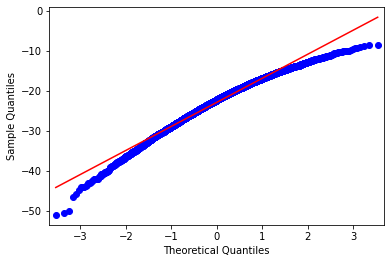

In [51]:
#Q-Q Plot to Visualize Normality for Bootstrapped Means
qqplot_data = qqplot(np.array(bootMeans), line='s').gca().lines

#Plots the QQ plot
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': 'blue'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': 'red'
    }

})


fig['layout'].update({
    'title': f'Quantile-Quantile Plot for BootStrapped Means',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


fig.show()
print(scipy.stats.shapiro(bootMeans))
print(' ')

In [52]:
#Price Movement Statistics
print('The Probability of an Upward Price Movement is: ',bernoulli)
print(f"{user_stock}'s' Volatility is: ",volatility,'%')

The Probability of an Upward Price Movement is:  0.5371769383697813
OHI's' Volatility is:  2.451839978649163 %


In [53]:
#PE Box plot
newPEs = [x for x in PEdates['PE'] if math.isnan(x) == False]
PESeq = [1 for i in range(0,len(newPEs),1)]

layout = go.Layout(
    title = f"{user_stock}'s PE Boxplot"
    )

trace1 = go.Scatter(
    name = 'PEs',
    x = newPEs,
    y = ['PEs' for i in newPEs],
    marker = dict(
        size = 5
    )

)


trace2 = go.Scatter(
    name = 'Current PE (ttm)',
    x = [currPE],
    y = ['PEs'],
    marker = dict(
        color = 'red',
        size = 10
    
    )

)

trace3 = go.Scatter(
    name = 'Forward PE',
    x = [(stonkPrices['close'][-1])/newEstimate],
    y = ['PEs'],
    marker = dict(
        color = 'purple',
        size = 10
        
        )
    
    )

trace4 = go.Scatter(
    name = 'Optimistic Forward PE',
    x = [(stonkPrices['close'][-1])/estimateOpt],
    y = ['PEs'],
    marker = dict(
        color = 'orange',
        size = 10
        
        )
    
    )

trace5 = go.Scatter(
    name = 'Pessimistic Forward PE',
    x = [(stonkPrices['close'][-1])/estimatePes],
    y = ['PEs'],
    marker = dict(
        color = 'orange',
        size = 10
        
        )
    
    )

trace6 = go.Violin(
    x = newPEs,
    meanline_visible=True,
    name = 'PEs',
    box_visible=True,
    marker_color = 'lightseagreen'

)

fig = go.Figure(data = [trace1, trace2,trace3,trace4,trace5,trace6],layout = layout)
fig.show()

#Prints out the 5 Number Summary
print('PE Ratio 5 Number Summary: ') 
print(pd.Series(PEdates['PE']).describe())
print("The Mean PE Ratio: ",statistics.mean(newPEs))
print("The current PE ttm Ratios is: ",currPE)
print('The Forward PE Ratio is:',(stonkPrices['close'][-1])/newEstimate)

PE Ratio 5 Number Summary: 
count    3971.000000
mean       28.227707
std        22.539991
min       -15.900000
25%        18.816455
50%        24.797385
75%        32.177672
max        91.874997
Name: PE, dtype: float64
The Mean PE Ratio:  28.227707077658973
The current PE ttm Ratios is:  30.010870228643004
The Forward PE Ratio is: 20.58302108829941


In [54]:
#Make PFFO Boxplot for REITs

if(sector == 'Real Estate/Construction'):

    pFFO = [x for x in pFFO if math.isnan(x) == False]
    PffoSeq = [1 for i in range(0,len(pFFO[1:]),1)]
    
    #Plots the P/FFO Boxplot
    layout = go.Layout(
    title = f"{user_stock}'s P/FFO Boxplot"
    )

    trace1 = go.Scatter(
        name = 'P/FFOs',
        x = pFFO,
        y = ['P/FFOs' for i in pFFO],
        marker = dict(
            size = 10
        )

    )
    
    trace2 = go.Violin(
    x = pFFO,
    meanline_visible=True,
    name = 'P/FFOs',
    box_visible=True,
    marker_color = 'lightseagreen'

    )
    
    trace3 = go.Scatter(
    name = 'Current P/FFO(ttm)',
    x = [pffo],
    y = ['P/FFOs'],
    marker = dict(
        color = 'red',
        size = 10
        
        )
    
    )
    
    fig = go.Figure(data = [trace1,trace2,trace3],layout = layout)
    fig.show()
    
    
    #Gets the 5 Number Summary
    print('P/FFO Ratio 5 Number Summary: ') 
    print(pd.Series(pFFO[1:]).describe())
    print("The Mean P/FFO Ratio: ",np.nanmean(pFFO[1:]))
    print("The Current P/FFO is: ", pffo)
    
else:
    pass

P/FFO Ratio 5 Number Summary: 
count    1249.000000
mean       13.165446
std         2.916019
min         4.936618
25%        10.135749
50%        13.357694
75%        15.487535
max        19.472811
dtype: float64
The Mean P/FFO Ratio:  13.165445749849294
The Current P/FFO is:  12.98711479432618


In [55]:
#Plots the Boxplot for the stock's PB ratio

#PB Ratio Boxplot
if(sector == 'Financial Services'):
    pbs = [x for x in pbs if math.isnan(x) == False]
    PBSeq = [1 for i in range(0,len(pbs),1)]

    #BoxPlot for PB ratios
    layout = go.Layout(
    title = f"{user_stock}'s PB Boxplot"
    )

    trace1 = go.Scatter(
        name = 'PBs',
        x = pbs,
        y = ['PBs' for i in pbs],
        marker = dict(
            size = 15
        )

    )
    
    trace2 = go.Violin(
    x = pbs,
    meanline_visible=True,
    name = 'PBs',
    box_visible=True,
    marker_color = 'lightseagreen'

    )
    
    trace3 = go.Scatter(
    name = 'Current PB(ttm)',
    x = [currPB],
    y = ['PBs'],
    marker = dict(
        color = 'red',
        size = 10
        
        )
    
    )
    
    fig = go.Figure(data = [trace1,trace2,trace3],layout = layout)
    fig.show()
    
    #Gets the 5 Number Summary for the PB Boxplot
    print("The PB Ratio 5 number Summary: ")
    print(pd.Series(pbs).describe())
    print("The Mean PB Ratio: ",statistics.mean(pbs))
    print("The current PB Ratio is: ",currPB)

else:
    pass

In [56]:
#Makes the dates workable
neoDate = []
for val in insiderDF['Date']:
    newDate = val[8]+val[9]+'/'+val[5]+val[6]+'/'+val[0]+val[1]+val[2]+val[3]
    neoDate.append(newDate)
    
#Plots the Insider Trading Bar Chart
layout = go.Layout(
    title = f"{user_stock}'s Insider Trading Time Series",
    yaxis = dict(
        title = '$'
    ),
    xaxis = dict(
        title = 'Date'
        )
    )

trace1 = go.Bar(
    x = neoDate,
    y = insiderDF['Exchange'],
    marker_color = insiderDF['Color']
    )

#Plots the Insider Trading Bar Chart

fig = go.Figure(data = [trace1],layout = layout)
fig.show()

In [57]:
#SP500 Correlation Data
sp500 = yahoo_fin.get_data('^GSPC',start_date = str(stonkPrices['dates'][0]),end_date = today_date)
circPlot = pyplotScatter('S&P 500',stonkPrices['close'],sp500['close'],f'{user_stock} Price',
              'S&P 500 Price')
print(scipy.stats.spearmanr(stonkPrices['close'],sp500['close']))

SpearmanrResult(correlation=0.8493850698618542, pvalue=0.0)


In [58]:
#